In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("spam.csv", encoding='latin-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2998,ham,"Oh, then your phone phoned me but it disconnected",NaN,NaN,NaN
2925,ham,Im done. Just studyn in library,NaN,NaN,NaN
5531,ham,Compliments to you. Was away from the system. ...,NaN,NaN,NaN
709,spam,4mths half price Orange line rental & latest c...,NaN,NaN,NaN
4207,ham,Or i go home first lar Ì_ wait 4 me lor.. I pu...,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1. Data cleaning
#2. EDA
#3. Text preprocessing
#4. model building
#5. evaluation
#6. Improvement
#7. website
#8. deploy

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 cols

df.drop(columns=["Unnamed: 2","Unnamed: 3", "Unnamed: 4"], inplace =True)

In [8]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#renaming the cols
df.rename(columns={"v1":"target", "v2":"text"},inplace =True)

In [10]:
df.sample(3)

,target,text
4385,ham,", im .. On the snowboarding trip. I was wonder..."
2354,ham,R we going with the &lt;#&gt; bus?
3212,ham,What's ur pin?


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
encoder.fit_transform(df['target'])

array([0, 0, 1, ..., 0, 0, 0])

In [13]:
df['target'] = encoder.fit_transform(df['target'])

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [16]:
df.duplicated().sum()

403

In [17]:
#remove duplicate
df.drop_duplicates(keep ='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [18]:
df = df.drop_duplicates(keep ='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(5169, 2)

# 2.EDA

In [21]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [22]:
df["target"].value_counts()

0    4516
1     653
Name: target, dtype: int64

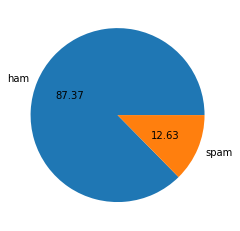

In [23]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [24]:
#data is imbalance

In [25]:
import nltk

In [26]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Ajit
[nltk_data]     Nayak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
df["num_characters"] = df['text'].apply(len)

In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
#number of words
df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: text, Length: 5169, dtype: int64

In [30]:
df["num_words"]= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [32]:
df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: text, Length: 5169, dtype: int64

In [33]:
df["num_sentences"]= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [34]:
df

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [35]:
df[["num_characters","num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [36]:
df[df["target"] == 0][["num_characters","num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [37]:
df[df["target"] == 1][["num_characters","num_words", "num_sentences"]].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [38]:
import seaborn as sns

In [39]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='num_characters', ylabel='Count'>

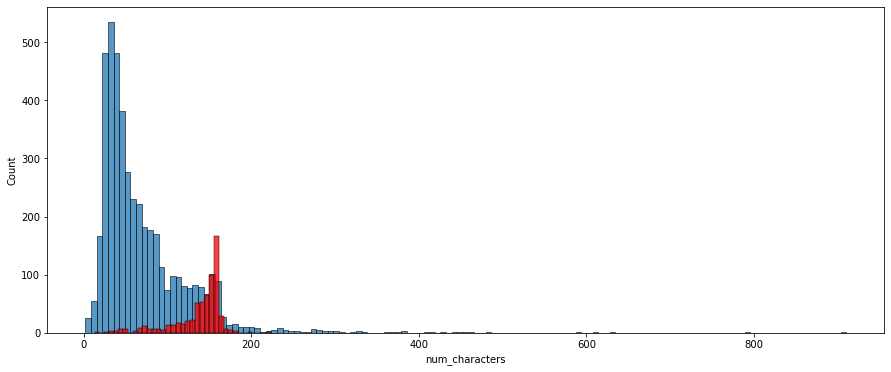

In [40]:
plt.figure(figsize= (15,6))
sns.histplot(df[df["target"] == 0]["num_characters"])
sns.histplot(df[df["target"] == 1]["num_characters"], color = 'red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

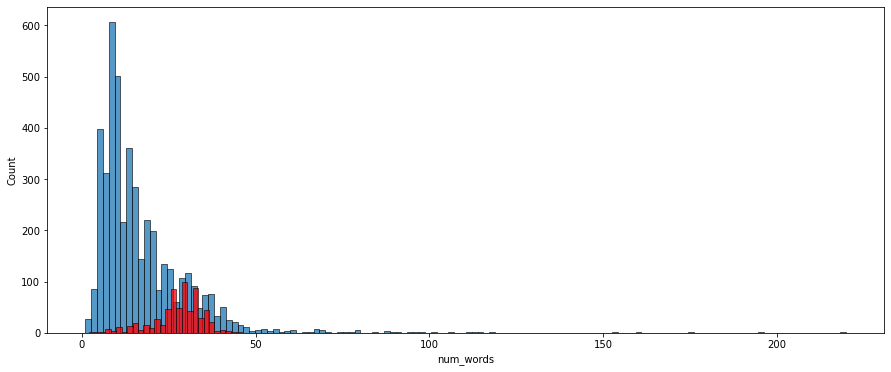

In [41]:
plt.figure(figsize= (15,6))
sns.histplot(df[df["target"] == 0]["num_words"])
sns.histplot(df[df["target"] == 1]["num_words"], color = 'red')

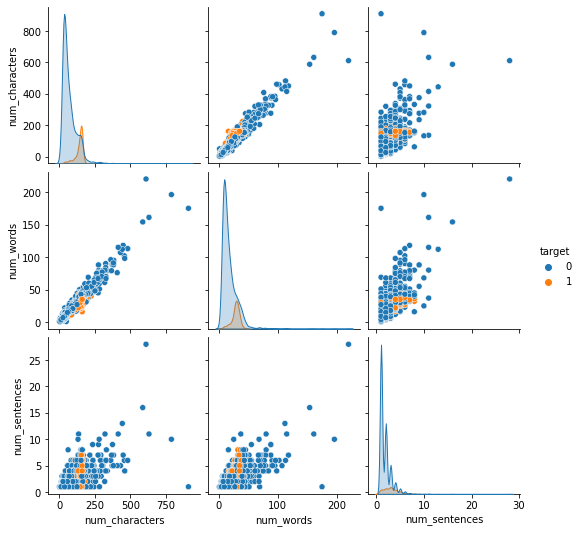

In [42]:
sns.pairplot(df,hue = 'target')

<AxesSubplot:>

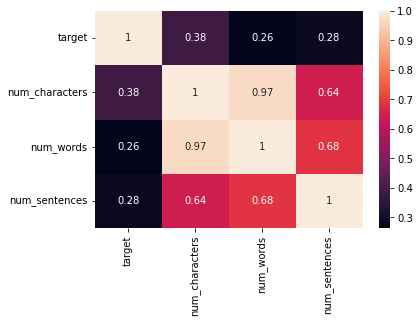

In [43]:
sns.heatmap(df.corr(), annot = True)

# 3. Data preprocessing

In [44]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem("fucking")

'fuck'

In [45]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [46]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
def transform_text(text):
    text = text.lower()                   #lower case
    text = nltk.word_tokenize(text)       #Tokenization
    
    y = []
    for i in text:
        if i.isalnum():                   #isalnum = alphanumeric (#removing special characters)
            y.append(i)
            
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:    #removing stop words and punchuation
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
        
    return " ".join(y)

In [48]:
transform_text("HI loved BRO WHERE ARE %% YOU and did you like my project on ML?") 

'hi love bro like project ml'

In [49]:
df["text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [50]:
df["transformed_text"] = df["text"].apply(transform_text)

In [51]:
df.sample(3)

,target,text,num_characters,num_words,num_sentences,transformed_text
2075,0,Must come later.. I normally bathe him in da a...,60,13,2,must come later normal bath da afternoon mah
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
267,1,Ur ringtone service has changed! 25 Free credi...,159,32,6,ur rington servic chang 25 free credit go choo...


In [52]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000, height = 1000, min_font_size = 10 , background_color = "white")

In [53]:
wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

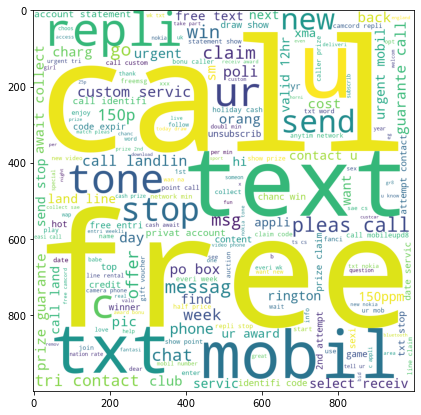

In [55]:
plt.figure(figsize =(15, 7))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

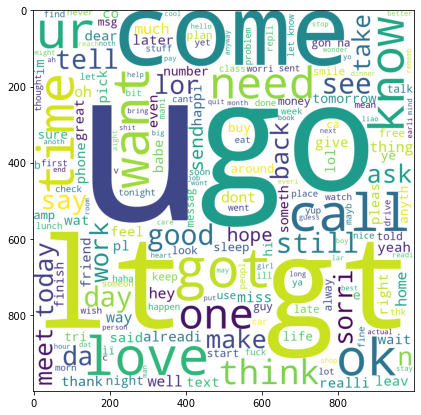

In [57]:
plt.figure(figsize =(15, 7))
plt.imshow(ham_wc)

In [58]:
spam_corpus = []
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [59]:
len(spam_corpus)

9939

In [60]:
from collections import Counter
Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [61]:
pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


C:\Users\Ajit Nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


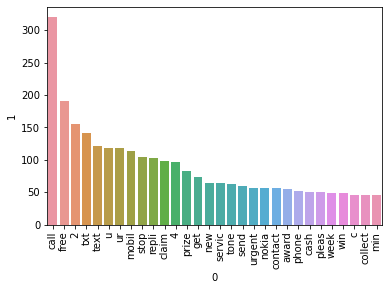

In [62]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [63]:
ham_corpus = []
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

35394

C:\Users\Ajit Nayak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


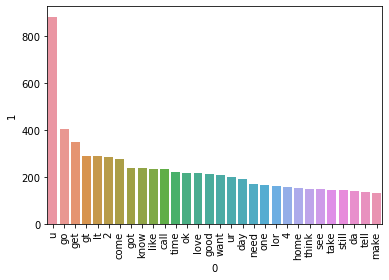

In [65]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = "vertical")
plt.show()

In [66]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4.Model Building

In [334]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)                             

In [288]:
#max_features=3000

In [289]:
#X = cv.fit_transform(df['transformed_text']).toarray()

In [335]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [291]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [292]:
# X = scaler.fit_transform(X)

In [293]:
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [336]:
X.shape

(5169, 3000)

In [337]:
y = df["target"].values

In [338]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [339]:
from sklearn.model_selection import train_test_split

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 2)

In [341]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB 
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [300]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [301]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [342]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [303]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [304]:
#tfidf and mnb

In [221]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [306]:
svc = SVC(kernel = 'sigmoid', gamma =1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = "liblinear", penalty = "l1")
rfc = RandomForestClassifier(n_estimators = 50, random_state = 2)
abc = AdaBoostClassifier(n_estimators=50, random_state = 2)
bc = BaggingClassifier(n_estimators=50, random_state= 2)
etc = ExtraTreesClassifier(n_estimators=50, random_state= 2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state= 2)
xgb = XGBClassifier(n_estimators=50, random_state= 2)

In [307]:
clfs = {
    "SVC" : svc,
    "KN" : knc,
    "NB" : mnb,
    "DT" : dtc,
    "LR" : lrc,
    "RF" : rfc,
    "AdaBoost": abc,
    "BgC": bc,
    "ETC" : etc,
    "GBDT" : gbdt,
    "xgb" : xgb
}

In [308]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred =clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)
    
    return accuracy,precision

In [197]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9729206963249516, 0.9741379310344828)

In [309]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    
    print("for ", name)
    print("Accuracy -", current_accuracy)
    print("Precision -", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

for  SVC
Accuracy - 0.9758220502901354
Precision - 0.9747899159663865
for  KN
Accuracy - 0.9052224371373307
Precision - 1.0
for  NB
Accuracy - 0.9709864603481625
Precision - 1.0
for  DT
Accuracy - 0.9294003868471954
Precision - 0.8282828282828283
for  LR
Accuracy - 0.9584139264990329
Precision - 0.9702970297029703
for  RF
Accuracy - 0.9748549323017408
Precision - 0.9827586206896551
for  AdaBoost
Accuracy - 0.960348162475822
Precision - 0.9292035398230089
for  BgC
Accuracy - 0.9574468085106383
Precision - 0.8671875
for  ETC
Accuracy - 0.9748549323017408
Precision - 0.9745762711864406
for  GBDT
Accuracy - 0.9477756286266924
Precision - 0.92
for  xgb
Accuracy - 0.971953578336557
Precision - 0.943089430894309


In [199]:
preformance_df = pd.DataFrame({"Algorithm":clfs.keys(),"Accuracy": accuracy_scores,"Precision": precision_scores}).sort_values("Precision", ascending= False)

In [200]:
preformance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.973888,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [201]:
performance_df1 = pd.melt(preformance_df, id_vars="Algorithm")

In [202]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.973888
3,ETC,Accuracy,0.975822
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.969052
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


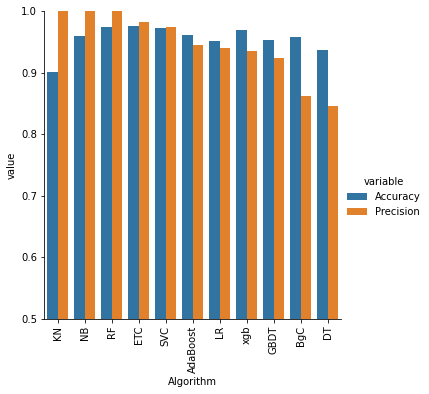

In [203]:
sns.catplot(x ="Algorithm", y = "value",hue = "variable",
             data = performance_df1, kind = 'bar', height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation ="vertical")
plt.show()

In [96]:
#IMPROVE MODEL

In [310]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [311]:
preformance_df.merge(temp_df, on = "Algorithm")

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.973888,1.000000,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297
7,xgb,0.969052,0.934426,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188


In [261]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [262]:
new_df = preformance_df.merge(temp_df,on='Algorithm')

In [263]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [264]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y
0,KN,0.900387,1.000000,0.905222,0.976190,0.905222,0.976190
1,NB,0.959381,1.000000,0.978723,0.946154,0.978723,0.946154
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.966151,0.925620,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.967118,0.964286,0.967118,0.964286
7,xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


In [281]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [282]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,0.976190,0.905222,0.976190,0.885880,0.833333
1,NB,0.959381,1.000000,0.978723,0.946154,0.978723,0.946154,0.973888,0.951220
2,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759,0.968085,0.981651
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576,0.980658,0.975806
4,SVC,0.972921,0.974138,0.966151,0.925620,0.966151,0.925620,0.866538,0.000000
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.964217,0.931624
6,LR,0.951644,0.940000,0.967118,0.964286,0.967118,0.964286,0.965184,0.955357
7,xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089,0.970986,0.942623
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000,0.951644,0.931373
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188,0.966151,0.899225


In [ ]:
NB	0.959381	1.000000	0.970986	1.000000

In [283]:
#voting classifier
svc = SVC(kernel = 'sigmoid', gamma =1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [284]:
voting = VotingClassifier(estimators=[("svc", svc), ('nb', mnb), ("et", etc)], voting="soft")

In [285]:
voting.fit(X_train, y_train)

VotingClassifier(estimators=[('svc',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [286]:
y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9738878143133463
Precision 1.0


In [330]:
#Applying stacking

estimators=[("svc", svc), ('nb', mnb), ("et", etc)]
final_estimator = RandomForestClassifier()

In [331]:
from sklearn.ensemble import StackingClassifier

In [332]:
clf = StackingClassifier(estimators = estimators , final_estimator = final_estimator)

In [333]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(y_test, y_pred))
print("Precision", precision_score(y_test, y_pred))

Accuracy 0.9787234042553191
Precision 0.9393939393939394


In [344]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl", 'wb'))
pickle.dump(mnb, open("model.pkl", 'wb'))
